# Exercice 4 : Empirical experimentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question a

Nous allons stocker les 5 tirages dans une variable $X$

In [2]:
n = 5
sigma2_reel = 1
X = np.random.normal(0, sigma2_reel, n)
print(X)

[-0.56587226 -0.7565457  -0.08542758 -2.15178031 -1.23169739]


## Question b

On sait que les estimateurs de maximum de vraissemblance pour $\mu$ et $\sigma^2$ sont:

$\hat{\mu} = \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} X_i$     et     $\hat{\sigma^2} = \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} (X_i-\overline{X})^2$

In [3]:
mu = 1/n * np.sum(X)
sigma2 = 1/n * np.sum((X-mu)**2)
print(mu, sigma2)

-0.9582646500473326 0.49115039513872


## Question c

Nous allons stocker nos résultats dans 2 vecteurs de dimension 10 000 $Y_\hat{\mu}$ et $Y_\hat{\sigma^2}$

In [4]:
m = 10000
X = np.random.normal(0, sigma2_reel, [n, m])
Y_mu = 1/n * np.sum(X, axis=0)
Y_sigma2 = 1/n * np.sum((X-Y_mu)**2, axis=0)

Traçons l'histogramme de $Y_\hat{\mu}$

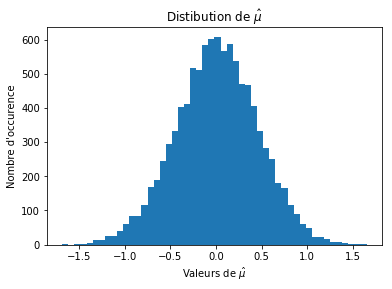

In [5]:
p, bins, patches = plt.hist(Y_mu, 50)

plt.xlabel('Valeurs de $\hat{\mu}$')
plt.ylabel("Nombre d'occurence")
plt.title('Distibution de $\hat{\mu}$')
plt.show()

Et l'histogramme de $Y_\hat{\sigma^2}$

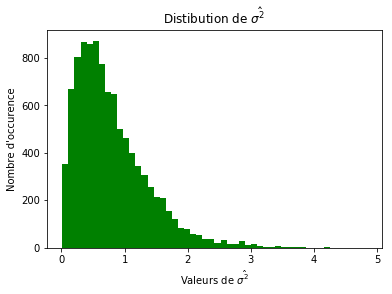

In [6]:
p, bins, patches = plt.hist(Y_sigma2, 50, facecolor='g')

plt.xlabel('Valeurs de $\hat{\sigma^2}$')
plt.ylabel("Nombre d'occurence")
plt.title('Distibution de $\hat{\sigma^2}$')
plt.show()

Nous reconnaissons ce qui semble être une *loi normale* $\mathcal{N}(0, \dfrac{1}{5})$ pour la distribution de $\hat{\mu}$ et une *loi de $\chi_4^2$* pour $\hat{\sigma^2}$ (à un facteur de normalisation près)

## Question d

Nous savons que le biais et la variance se calculent de la manière suivante: 

$b(\theta^*) = \mathbb{E}_{\theta^*} (\hat{\theta}) - \theta^*$ , $V(\hat{\theta}) = \mathbb{E} (\hat{\theta}^2) - \mathbb{E} (\hat{\theta})^2$

Pour estimer numériquement le biais, nous allons donc devoir utiliser la formule de la moyenne empirique:

$\hat{m_1} = \dfrac{1}{m}\displaystyle\sum_{i=1}^{m} \hat{\theta_i}$ 

Pour estimer numériquement la variance, nous allons devoir utiliser la formule du moment empirique d'ordre 2:

$\hat{m_2} = \dfrac{1}{m}\displaystyle\sum_{i=1}^{m} \hat{\theta_i}^2$ 

In [7]:
# le paramètre theta que nous considérons est sigma2

m1_hat = 1/m * np.sum(Y_sigma2)
m2_hat = 1/m * np.sum(Y_sigma2**2)

b_empirique = m1_hat - sigma2_reel
V_empirique = m2_hat - m1_hat**2

print(b_empirique, V_empirique)

-0.20285739530023494 0.32689305101834243


## Question e

Nous avions trouvé dans l'exercice 3 que:

$b_n(\sigma^2) =  -\dfrac{\sigma^2}{n}$ et $V(\hat{\sigma^2}) = \dfrac{2\sigma^4}{n^2}(n-1)$

In [8]:
b_reel = -sigma2_reel / n
V_reel = (2*sigma2_reel**2 *(n-1)) / n**2

print(b_reel, V_reel)
print(b_reel/b_empirique , V_reel/V_empirique)

-0.2 0.32
0.9859142660487881 0.9789134366825202


Ainsi, notre estimation empirique est très proche de l'estimation théorique que nous avons trouvé à l'exercice 3